In [1]:
import os
import sys
#os.chdir('./ChexNet')
os.getcwd()

'/home/roberto/Documents/CheXNet'

In [2]:
runsdir = '/home/roberto/Dropbox/SSL_Chexnet_training_data/mestrado_backup/original runs (normal augmentation, k=0.5, experiments with LR)/'

In [3]:
import numpy as np
from torchvision.transforms import transforms

In [4]:
total = 50_000

train5 = 5_000   # rotulado
train95 = 45_000 # nao rotulado

total_validacao = 7371
total_teste = 22_000

In [5]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [6]:
def tb_tags(path):
    ea = EventAccumulator(path)
    ea.Reload()
    return ea.Tags()['scalars']
    
def tb_values(path, tag):
    ea = EventAccumulator(path)
    ea.Reload()
    times, steps, vals = zip(*ea.Scalars(tag))
    return times, steps, vals

# Treinamento particao 20%

['loss/train/', 'lr/train/', 'auroc/train', 'training_time/train']
['loss/train/pseudolabels', 'lr/train/pseudolabels', 'auroc/pseudolabels', 'training_time/pseudolabels']
['loss/train', 'lr/train', 'auroc/train', 'training_time']


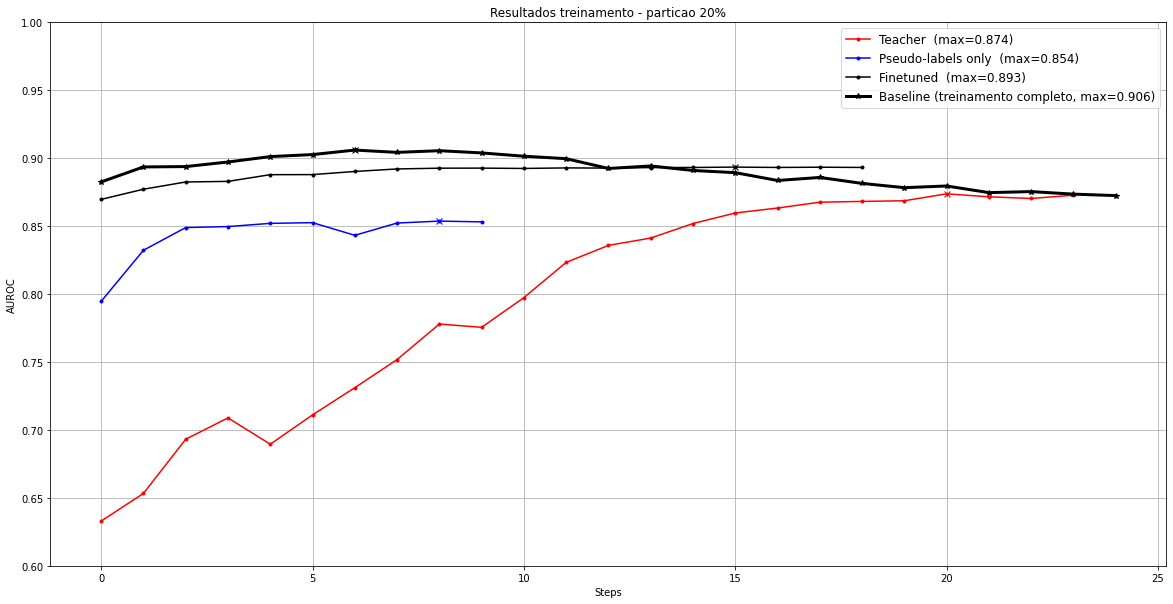

In [7]:
teacher  = runsdir+'evaluation 20%/effusion_train20%_teacher_00/'
pseudo   = runsdir+'evaluation 20%/effusion_train20%_student_pseudolabels_00/'
finetune = runsdir+'evaluation 20%/effusion_train20%_student_finetune_00/'
fullrun = runsdir+'evaluation full train/effusion_full_train_02/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/train')
data_pseudo = tb_values(pseudo, 'auroc/pseudolabels')
data_finetune = tb_values(finetune, 'auroc/train')
data_full_train = tb_values(fullrun, 'auroc/train')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 20%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_oldrun/auroc_20%_partition.png')

# Treinamento partição 10%

['loss/train', 'lr/train', 'auroc/train', 'training_time']
['loss/train', 'lr/train', 'auroc/train', 'training_time']
['loss/train', 'lr/train', 'auroc/train', 'training_time']


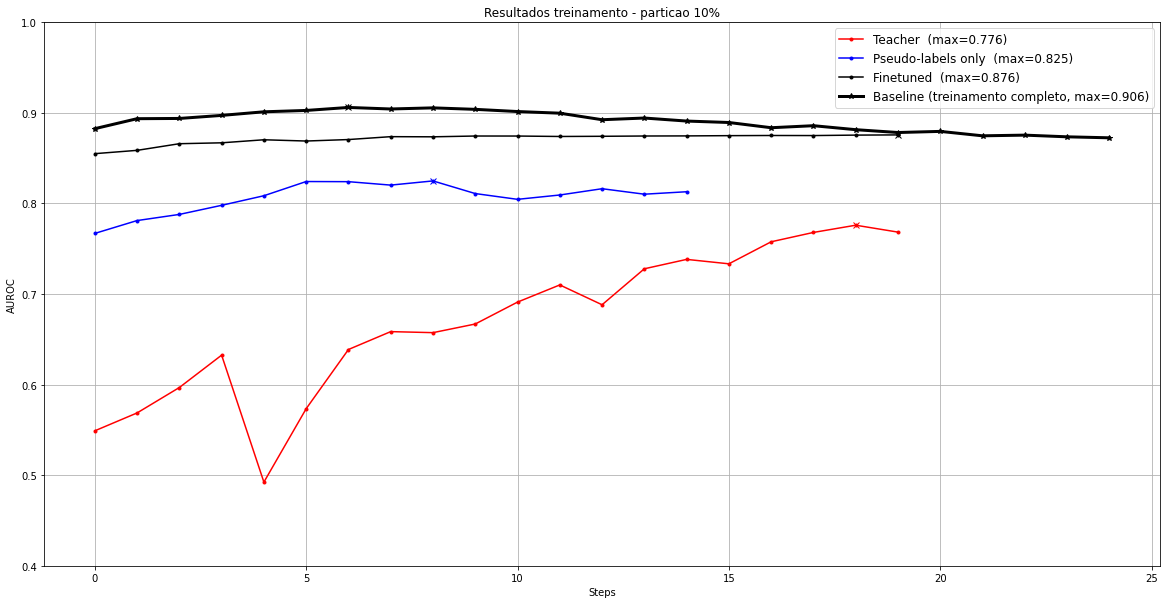

In [8]:
teacher  = runsdir+'evaluation 10%/effusion_train10%_teacher_00/'
pseudo   = runsdir+'evaluation 10%/effusion_train10%_student_pseudolabels_00/'
finetune = runsdir+'evaluation 10%/effusion_train10%_student_finetune_00/'
fullrun = runsdir+'evaluation full train/effusion_full_train_02/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/train')
data_pseudo = tb_values(pseudo, 'auroc/train')
data_finetune = tb_values(finetune, 'auroc/train')
data_full_train = tb_values(fullrun, 'auroc/train')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.4,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 10%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_oldrun/auroc_10%_partition.png')

# Treinamento partição 5%

['loss/train', 'lr/train', 'auroc/train', 'training_time']
['loss/train', 'lr/train', 'auroc/train', 'training_time']
['loss/train', 'lr/train', 'auroc/train', 'training_time']


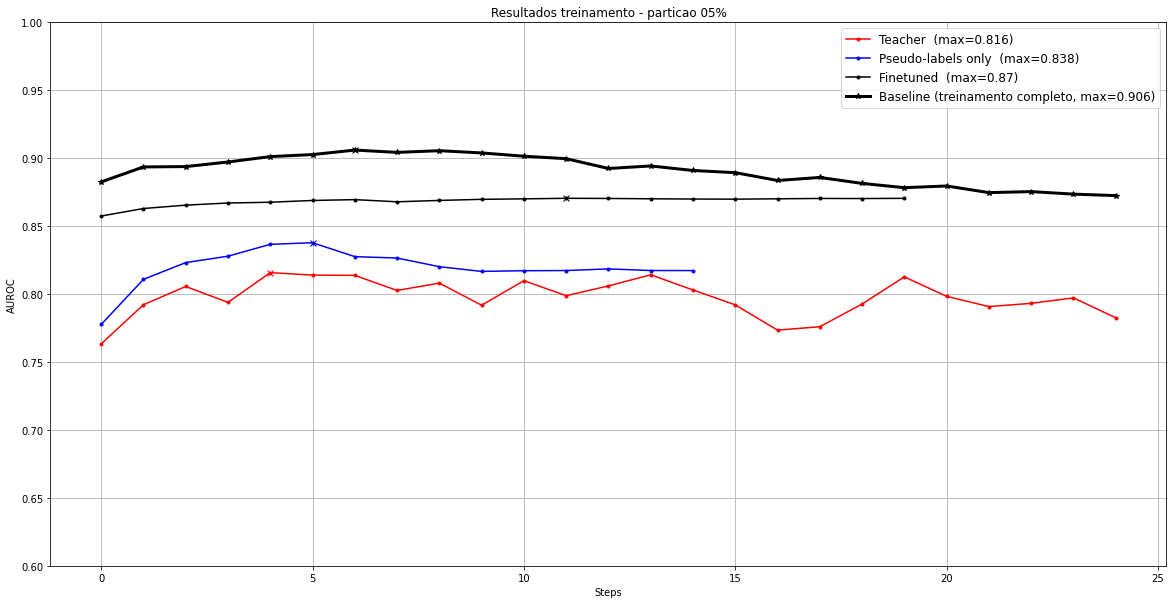

In [9]:
teacher  = runsdir+'evaluation 5%/effusion_train05%_teacher_00/'
pseudo   = runsdir+'evaluation 5%/effusion_train05%_student_pseudolabels_01/'
finetune = runsdir+'evaluation 5%/effusion_train05%_student_finetune_00/'
fullrun = runsdir+'evaluation full train/effusion_full_train_02/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/train')
data_pseudo = tb_values(pseudo, 'auroc/train')
data_finetune = tb_values(finetune, 'auroc/train')
data_full_train = tb_values(fullrun, 'auroc/train')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 05%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_oldrun/auroc_05%_partition.png')

# Treinamento particao 2%

['lr/train', 'auroc/train', 'training_time']
['loss/train', 'lr/train', 'auroc/train', 'training_time']
['lr/train', 'auroc/train', 'training_time']


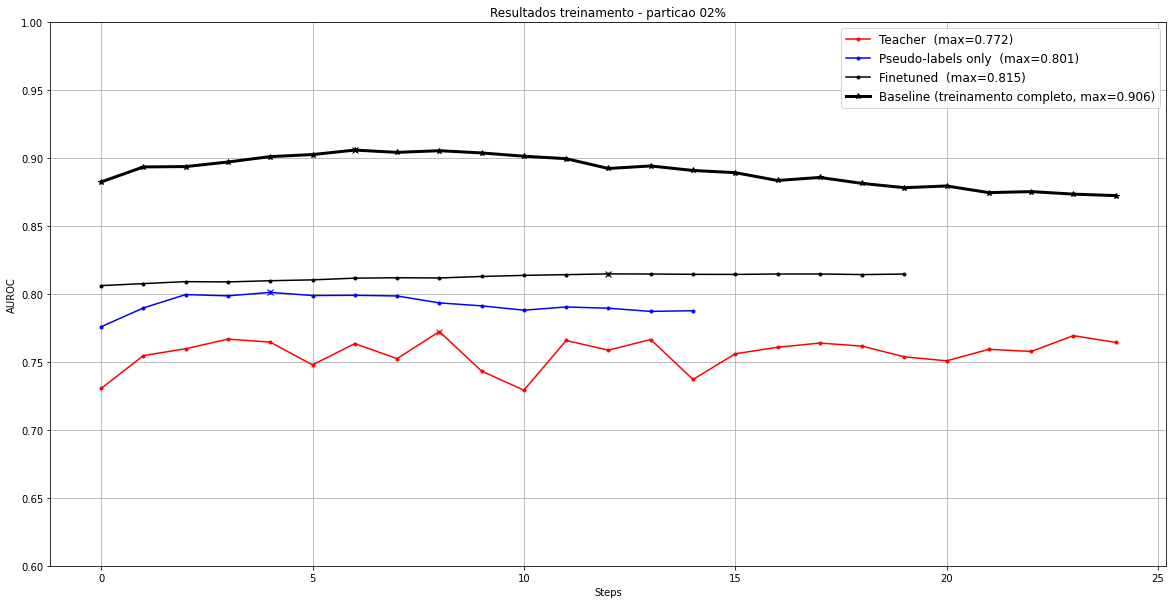

In [10]:
teacher  = runsdir+'evaluation 2%/effusion_train02%_teacher_00/'
pseudo   = runsdir+'evaluation 2%/effusion_train02%_student_pseudolabels_00/'
finetune = runsdir+'evaluation 2%/effusion_train02%_student_finetune_00/'
fullrun = runsdir+'evaluation full train/effusion_full_train_02/'

for folder in [teacher, pseudo, finetune]:
    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/train')
data_pseudo = tb_values(pseudo, 'auroc/train')
data_finetune = tb_values(finetune, 'auroc/train')
data_full_train = tb_values(fullrun, 'auroc/train')

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 02%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_oldrun/auroc_02%_partition.png')